In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Building an Image Classifier
First let's install and import TensorFlow and Keras

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.4.0'

In [4]:
tf.__version__


'2.4.1'

In [5]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
gpus= tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

Link  https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles

Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. The class labels are:

| Label |	Description |
--- | --- |
| 0	| T-shirt/top
| 1	| Trouser
| 2	| Pullover
| 3	| Dress
| 4	| Coat
| 5	| Sandal
| 6	| Shirt
| 7	| Sneaker
| 8	| Bag
| 9	| Ankle boot

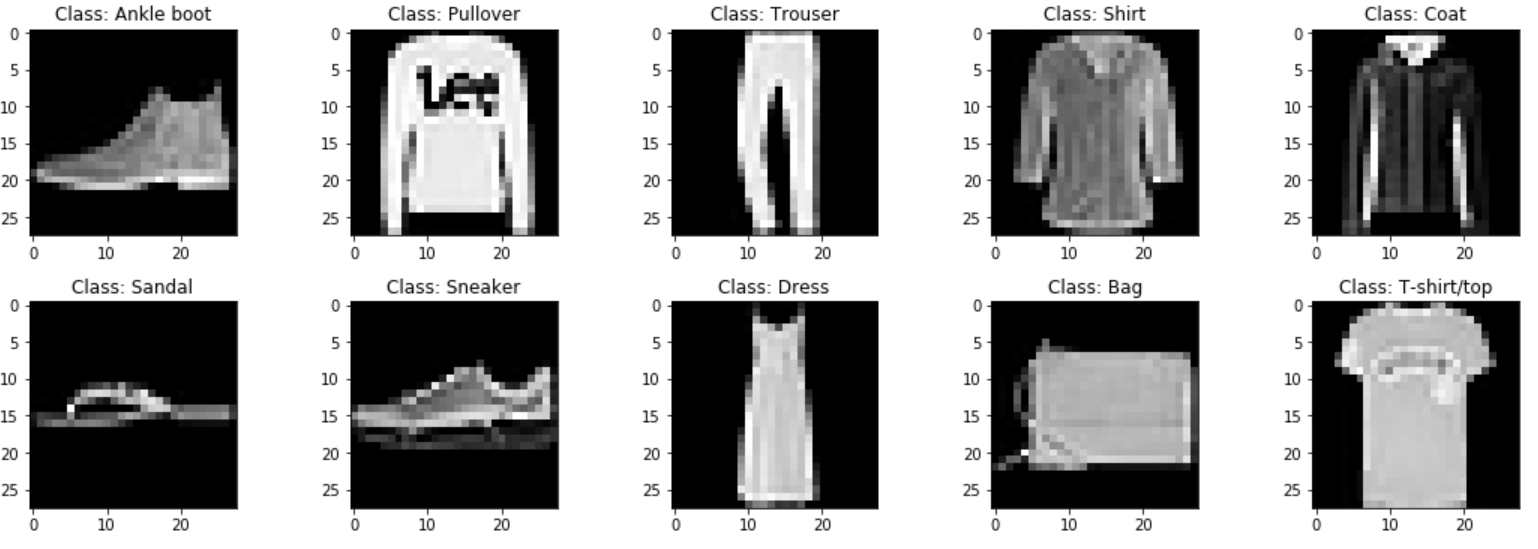

### Usage:
from keras.datasets import fashion_mnist

> (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Returns:
2 tuples:
1. x_train, x_test: uint8 array of grayscale image data with shape (num_samples, 28, 28).
2. y_train, y_test: uint8 array of labels (integers in range 0-9) with shape (num_samples,).

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

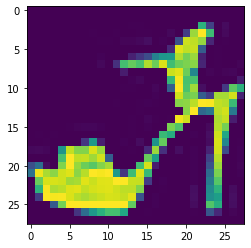

In [9]:
plt.imshow(X_train_full[9])
plt.show()

In [10]:
y_train_full[9]

5

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train_full[9]]

'Sandal'

In [13]:
X_train_full[9].shape

(28, 28)

### Data normalization
We then normalize the data dimensions so that they are of approximately the same scale.

In [14]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split the data into train/validation/test datasets
In the earlier step of importing the date, we had 60,000 datasets for training and 10,000 test datasets. Now we further split the training data into train/validation. Here is how each type of dateset is used in deep learning:

* __Training data__ — used for training the model
* __Validation data__ — used for tuning the hyperparameters and evaluate the models
* __Test data__ — used to test the model after the model has gone through initial vetting by the validation set.

In [15]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [16]:
X_valid[0].shape

(28, 28)

### Create the model architecture
There are two APIs for defining a model in Keras:
* Sequential model API
* Functional API

In [17]:
np.random.seed(42)
tf.random.set_seed(42)

In [18]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


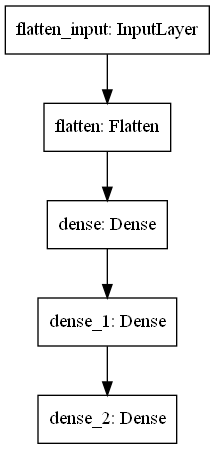

In [20]:
import pydot
keras.utils.plot_model(model)

We can access the parameters using get_weight() method

In [21]:
weights, biases = model.layers[1].get_weights()

In [22]:
weights.shape

(784, 300)

In [23]:
weights.shape

(784, 300)

In [24]:
biases.shape

(300,)

In [25]:
biases.shape

(300,)

In [26]:
# model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
model_history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.6140 - accuracy: 0.7848 - val_loss: 0.3679 - val_accuracy: 0.8640
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3692 - accuracy: 0.8642 - val_loss: 0.3991 - val_accuracy: 0.8584
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3317 - accuracy: 0.8775 - val_loss: 0.3114 - val_accuracy: 0.8862
Epoch 4/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3007 - accuracy: 0.8876 - val_loss: 0.3090 - val_accuracy: 0.8898
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2879 - accuracy: 0.8916 - val_loss: 0.2935 - val_accuracy: 0.8916
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2631 - accuracy: 0.9026 - val_loss: 0.3207 - val_accuracy: 0.8852
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2517 - accuracy: 0.9046 - val_loss: 0.3113 - val_accura

In [28]:
print(model.metrics_names)
print(model_history.params)
print(model_history.history.keys())

['loss', 'accuracy']
{'verbose': 1, 'epochs': 30, 'steps': 1719}
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


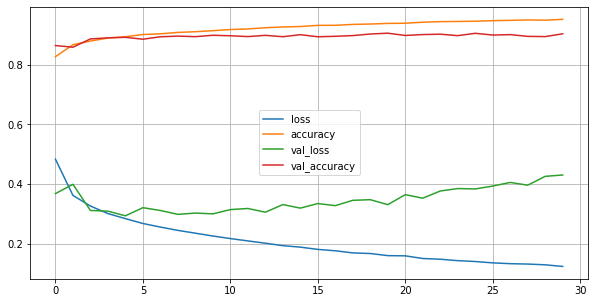

In [29]:
pd.DataFrame(model_history.history).plot(figsize=(10, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1)
plt.gca()
plt.show()

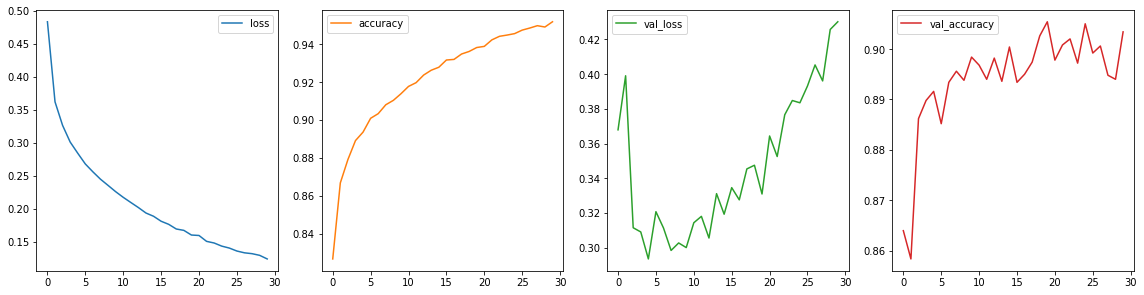

In [30]:
pd.DataFrame(model_history.history).plot(figsize=(16, 16), layout=(4,4), subplots=True)
plt.tight_layout()
plt.show()

# Test

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.4964 - accuracy: 0.8923


[0.4963846206665039, 0.892300009727478]

In [34]:
X_new = X_test[:3]

In [35]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.93, 0.  , 0.07, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [40]:
y_proba.shape

(3, 10)

In [39]:
np.argmax(y_proba,1)

array([9, 2, 1], dtype=int64)

In [37]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [42]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

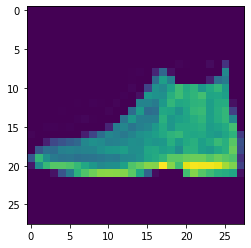

In [45]:
plt.imshow(X_test[0])
plt.show()

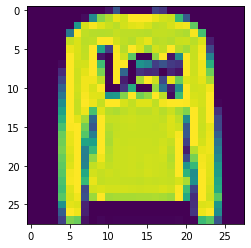

In [46]:
plt.imshow(X_test[1])
plt.show()

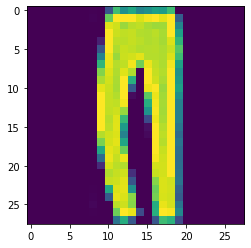

In [47]:
plt.imshow(X_test[2])
plt.show()